# Dataset Description

**Source :**

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption



**Data Set Information:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.



**Attribute Information:**

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a  dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Importing some common Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
from sklearn.metrics import mean_squared_error

### Loading Dataset using pandas Package

In [2]:
Data = pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\household_power_consumption\\household_power_consumption.txt",sep=';')

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset set is in txt format and also it separated by ';'. So, we used sep argument to make correct dataframe / tabel

In [3]:
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
Data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0
2075258,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0.0


## Checking Data Structure
-> Number of rows / instaces / enteries

-> Number of columns / features / attributes

In [5]:
print(f"Number of rows are {Data.shape[0]}. \nNumber of Columns are {Data.shape[1]}.")

Number of rows are 2075259. 
Number of Columns are 9.


## From the Head & Tail of the Dataset, we can see starting/minimum datestamp is '16-12-2006' & last/maximum datestamp is '26-11-2010'. This means this Data set is of 3 years 11 months 11 days. But the total number of obervation/instances are more than 20 Lakh/2 million which means data is recorded or given hourwise.

## We can forecast House Voltage on many level like hour level, day level, week level, month level, year level from the given data.

# -> let say Family whose house's readings are recorded want to estimate there montly electricity bill on the basis of power they used in a month. So according to this we try to Forcast Voltage of the house on montly level.

## Information about columns

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Clearly from this we can see there are many features which are numbers in real but categorised as object.

So, we will change their types.

In [7]:
Data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

To change the types of the columns, First we seprate Date, Time and Other Features then we **use apply function and .to_numeric function**

In [8]:
temp1 = Data[['Date', 'Time']]
temp1.head(2)

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00


In [9]:
temp1[['Date']] = temp1[['Date']].apply(pd.to_datetime)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Time    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 31.7+ MB


C:\Users\SS\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
temp1.head()

,Date,Time
0,2006-12-16,17:24:00
1,2006-12-16,17:25:00
2,2006-12-16,17:26:00
3,2006-12-16,17:27:00
4,2006-12-16,17:28:00


In [11]:
temp2 = Data[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
              'Sub_metering_3']]
temp2.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [12]:
temp2 = temp2.apply(pd.to_numeric, errors='coerce')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


In [13]:
Data = pd.concat([temp1,temp2],axis=1)
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Now Data is ready with correct feature types

# Checking Missing Values

In [14]:
Data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are equal number of instances .i.e., 25979 which are empty in our Data. which means 25979 rows of the datasets are completely empty.

Let's check this!

In [15]:
# creating bool series True for NaN values 
bool_series = pd.isnull(Data["Voltage"])  
    
# filtering data  
# displaying data only with Voltage = NaN  
Data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we fill these rows using **interpolate function** using linear method.

In [16]:
Data = Data.interpolate(method ='linear') 

Checking again if there left any null values. 

In [17]:
Data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Missing Values are handled

# Reseting Index
We reset 'Date' as index

In [18]:
Data.set_index('Date',inplace = True)
Data.head(4)

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0


# Resampling Data on Monthly Level

In [19]:
Model_Dataset = Data['Voltage'].resample('M').mean()

In [20]:
Model_Dataset = Model_Dataset.to_frame()

In [21]:
Model_Dataset.head()

,Voltage
Date,
2006-12-31,241.440787
2007-01-31,240.145796
2007-02-28,239.871107
2007-03-31,239.948532
2007-04-30,238.373893


In [22]:
print(f"Number of rows are {Model_Dataset.shape[0]}. \nNumber of Columns are {Model_Dataset.shape[1]}.")

Number of rows are 49. 
Number of Columns are 1.


# Visualization

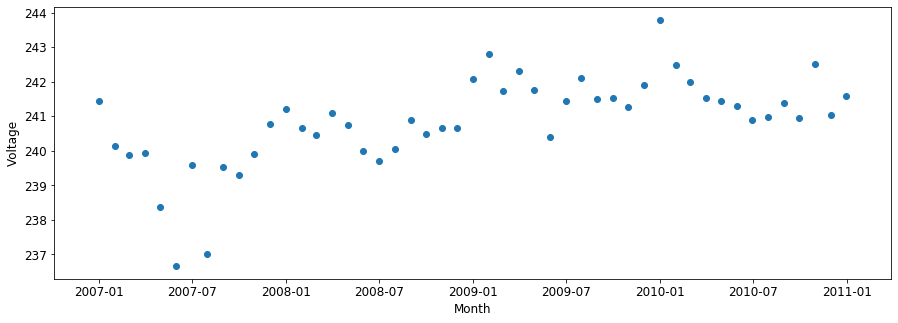

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(Model_Dataset.index,Model_Dataset['Voltage'])
plt.tick_params(labelsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Voltage',fontsize=12)
plt.show()

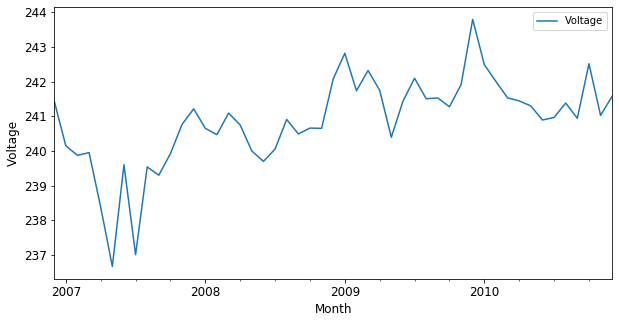

In [24]:
Model_Dataset.plot(figsize=[10,5],fontsize=12)
plt.legend(fontsize=10)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Voltage',fontsize=12)
plt.show()

### Yearly voltage is slowly increasing . So it show there is some trend in this Data

# Decomposing of Data

### Importing module for decomposition

In [25]:
import statsmodels.api as sm

Reviewing the plot, it suggests that there is some seasonality, but the **amplitude (height) of the cycles does not appears to be increasing** or **seasonal variation is relatively constant over time**, suggesting that it is **Additive Model**.

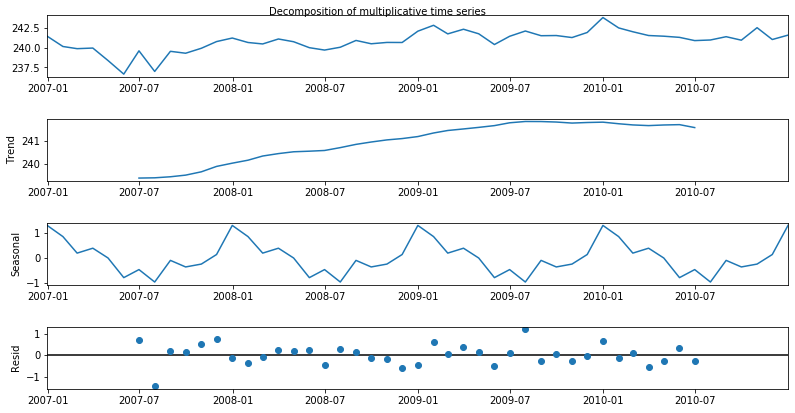

In [26]:
# Decomposition of Additive time series
decomposition = sm.tsa.seasonal_decompose(Model_Dataset, model = 'additive')

# Visualisation
grp = decomposition.plot()
grp.suptitle('Decomposition of multiplicative time series',fontsize = 10)
grp.set_figwidth(12)
grp.set_figheight(6)

plt.show()

**The following are some of our key observations from this analysis:**

1) Trend: clearly it is not a straight line. It is constantly increasing.

2) Seasonality: as discussed, seasonal plot displays a fairly consistent month-on-month or year-on-year pattern. The yearly seasonal components are average values for a year after removal of trend.

3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components.

The expectations from remainder component are that it should look like white noise a periodic pattern.

# Data Stationarity Test

There are two ways to check the stationarity of Data.

**1.** By Rolling mean and standard deviation.

**2.** Augmented Dickey–Fuller test (ADF) test

**First let check with Rolling Mean**

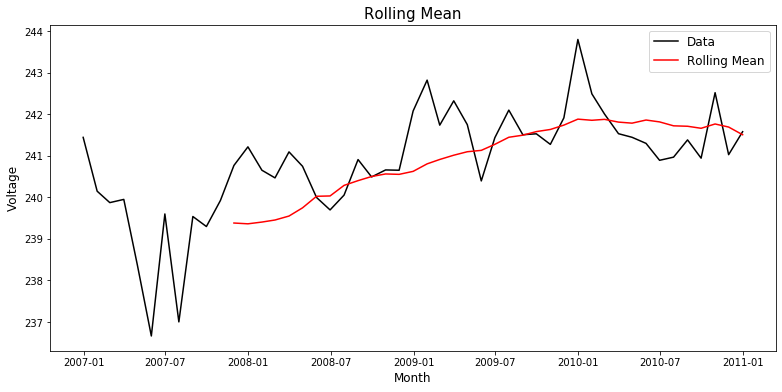

In [27]:
roll_mean = Model_Dataset.rolling(window = 12).mean()

plt.figure(figsize=(13,6))

plt.plot(Model_Dataset , color = 'black' , label = "Data")
plt.plot(roll_mean, color = 'red' , label = "Rolling Mean")
    
plt.legend(loc = 'best' , fontsize = 12)
plt.title("Rolling Mean" , fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Voltage', fontsize = 12)
plt.show()

Rolling Mean curve is increasing yearly. It is **not constant**. Therfefore, **Data is not stationary.**

### Now we define a Function which will test the data by both ways.

Importing adfuller function from stats tools module

In [28]:
from statsmodels.tsa.stattools import adfuller

**Defining DStationary_Test function** with two paramters timeseries & average to check stationarity.

In [29]:
def DStationary_Test(timeseries , average):
    plt.figure(figsize=(13,6))
    
    plt.plot(timeseries , color = 'black' , label = "Data")
    plt.plot(average , color = 'red' , label = "Rolling Mean")
    
    plt.legend(loc = 'best' , fontsize = 12)
    plt.title("Rolling Mean" , fontsize = 15)
    plt.xlabel('Month', fontsize = 12)
    plt.ylabel('Voltage', fontsize = 12)
    plt.show()
    
    print("\n\n")
    result=adfuller(timeseries)
    
    print('Augmented Dickey Fuller test:--')
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observation used']
    for value,label in zip(result,labels):
        print(f'{label} : {str(value)}')
        
    if result[1]<=0.05:
        print("\np-value < 0.05\nConclusion:\nStrong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("\np-value > 0.05\nConclusion:\nWeak evidence against the null hypothesis, accept the null hypothesis. Data is not stationary")

**Calling DStationarity_Test Function with shifting Model_Dataset by 1**

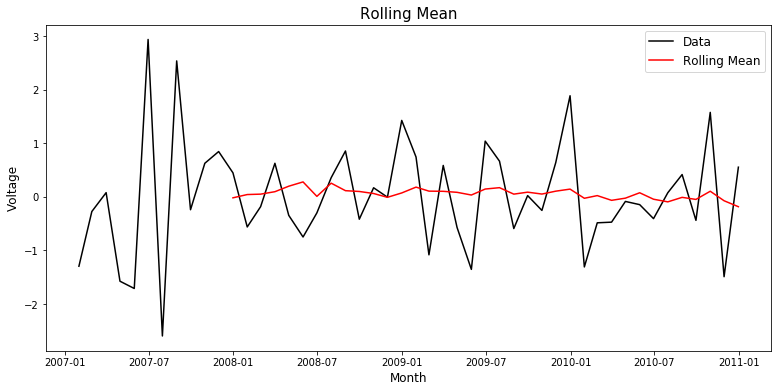




Augmented Dickey Fuller test:--
ADF Test Statistics : -6.179880589537664
p-value : 6.493993404721839e-08
#Lags used : 1
Number of Observation used : 46

p-value < 0.05
Conclusion:
Strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [64]:
DataMINUSshift = Model_Dataset - Model_Dataset.shift(1)
roll_avg = DataMINUSshift.rolling(window = 12).mean()
DataMINUSshift.dropna(inplace=True)

DStationary_Test(DataMINUSshift, roll_avg)

## Finally Data is Stationary. Now we can apply ARIMA Model on Data

### ARIMA is a combination of 3 parts and it has 3 parameters i.e. **p, d, q**
1. AutoRegressive (AR) – extract the influence of the previous periods values on the current period.
   **p** is the parameter associated with the auto-regressive aspect of the model, which incorporates past values.
   
2. Integrated (I) – Subtract time series from its lagged series to extract trends from the data. 
    **d** is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
    
3. Moving Average (MA) – extract the influence of the previous period’s error terms on the current period’s error.
    **q** is the parameter associated with the moving average part of the model.

# 1. AutoRegessive 

Import pacf from statsmodels package

In [31]:
from statsmodels.tsa.stattools import pacf

Text(0.5, 1.0, 'Partial Autocorrelation Function using Curve')

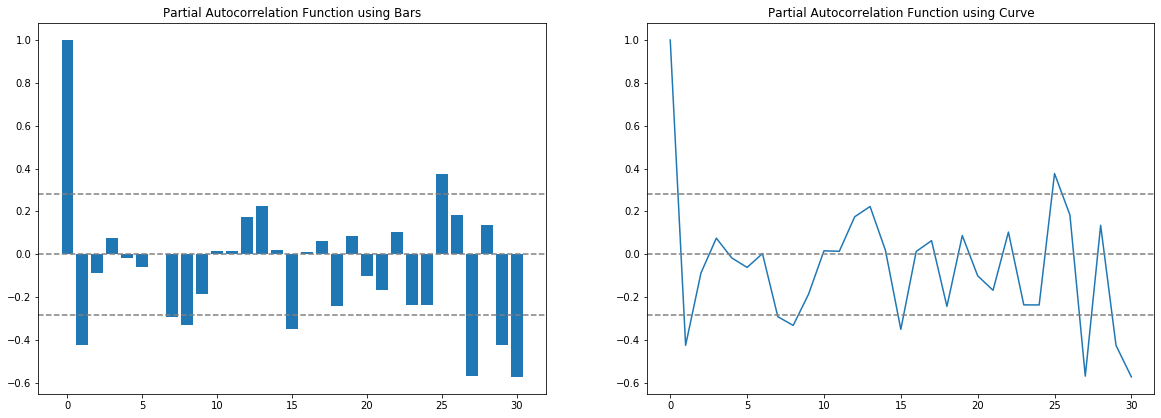

In [32]:
AR_pacf = pacf(DataMINUSshift.dropna() , nlags=30)
lags = np.array([i for i in range(31)])

# Creating a figure
fig = plt.figure(figsize=(20,15))

# Defining subplots and their positions in the figure
fig1 = fig.add_subplot(221)
fig2 = fig.add_subplot(222)


fig1.bar(lags, AR_pacf)
fig1.axhline(y=0,linestyle='--',color='gray')
fig1.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig1.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig1.set_title('Partial Autocorrelation Function using Bars')

fig2.plot(AR_pacf)
fig2.axhline(y=0,linestyle='--',color='gray')
fig2.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig2.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig2.set_title('Partial Autocorrelation Function using Curve')

## From Partial AutoCorrelation plot, we can see around 1 curve enters / intersects confidence interval.
So, for first our value of p = 1.

# 2. Integrated

### From the above we removed the trend from data by shifting it by 1. So, value of d = 1.

# 3. Moving Average

In [33]:
# Importing acf (autocorrelation function) from statsmodels package
from statsmodels.tsa.stattools import acf

C:\Users\SS\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function using Curve')

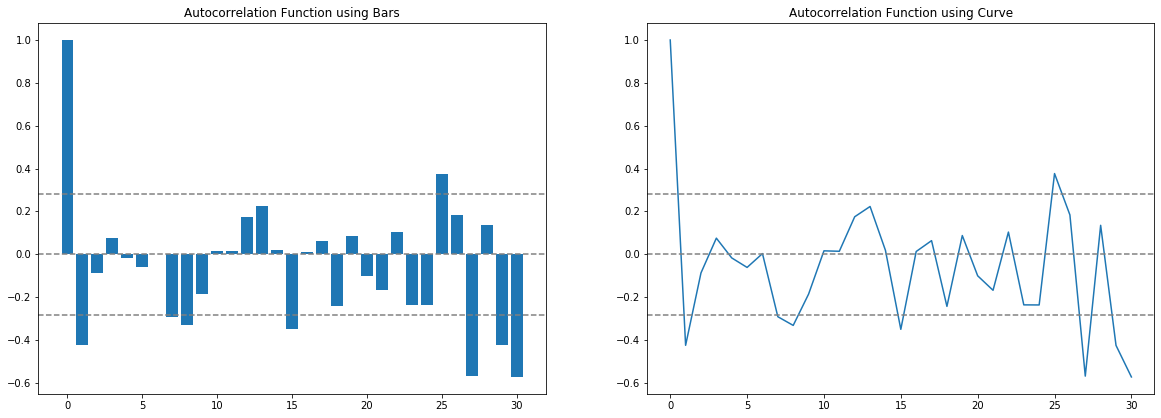

In [34]:
AR_acf = acf(DataMINUSshift.dropna() , nlags=30)
lags = np.array([i for i in range(31)])

# Creating a figure
fig = plt.figure(figsize=(20,15))

# Defining subplots and their positions in the figure
fig1 = fig.add_subplot(221)
fig2 = fig.add_subplot(222)


fig1.bar(lags, AR_pacf)
fig1.axhline(y=0,linestyle='--',color='gray')
fig1.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig1.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig1.set_title('Autocorrelation Function using Bars')

fig2.plot(AR_pacf)
fig2.axhline(y=0,linestyle='--',color='gray')
fig2.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig2.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig2.set_title('Autocorrelation Function using Curve')

## Autocorrelation plot is same as Partial Autocorrelation.
So, our value of q = 1.

# Forecasting
We do Forecasting by 3 Models:
1. AR Model
2. MA Model
3. ARIMA Model

### Import ARIMA from statsmodels Package.

In [36]:
from statsmodels.tsa.arima_model import ARIMA

## AR Model

First we define AR_Forecast Model with parameter p = 1 , d = 1 and q = 0 then we fit it and use it to forecast values.

In [59]:
AR_Forecast = ARIMA(Model_Dataset, order=(1, 1, 0))

In [60]:
AR_Forecast_fit = AR_Forecast.fit(disp=-1) 

The Akaike information criterion (AIC) score of AR Model

In [61]:
AR_Forecast_fit.aic

137.4399658483266

Root Mean Square Error (RMSE) of the Model

In [69]:
RMSE_AR = np.sqrt(mean_squared_error(DataMINUSshift,AR_Forecast_fit.fittedvalues))
RMSE_AR

0.952821611836535

Visualization

Text(0.5, 1.0, 'Original vs AR Forecast')

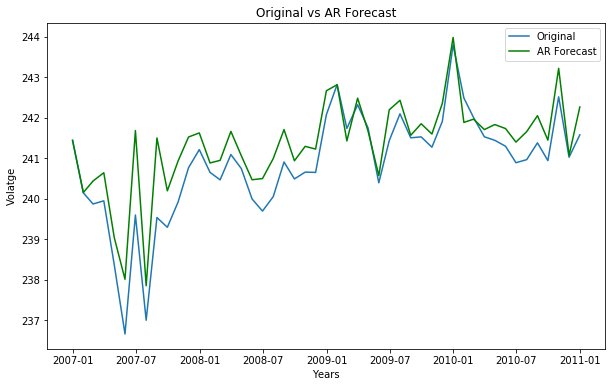

In [76]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Pred_AR_diff = pd.Series(AR_Forecast_fit.fittedvalues, copy=True)
Pred_AR_diff_cumsum = Pred_AR_diff.cumsum()

# Taking back to Original Scale
Pred_AR = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Pred_AR = Pred_AR.add(Pred_AR_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] , label = 'Original')
plt.plot(Pred_AR , color = 'green' , label = 'AR Forecast')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs AR Forecast')

# MA Model

First we define MA_Forecast Model with parameter p = 0 , d = 1 and q = 1 then we fit it and use it to forecast values.

In [71]:
MA_Forecast = ARIMA(Model_Dataset, order=(0, 1, 1))

In [72]:
MA_Forecast_fit = MA_Forecast.fit(disp=-1) 

AIC Score

In [73]:
MA_Forecast_fit.aic

137.8004372132036

RMSE 

In [74]:
RMSE_MA = np.sqrt(mean_squared_error(DataMINUSshift,MA_Forecast_fit.fittedvalues))
RMSE_MA

0.9561268652460111

Visualization

Text(0.5, 1.0, 'Original vs MA Forecast')

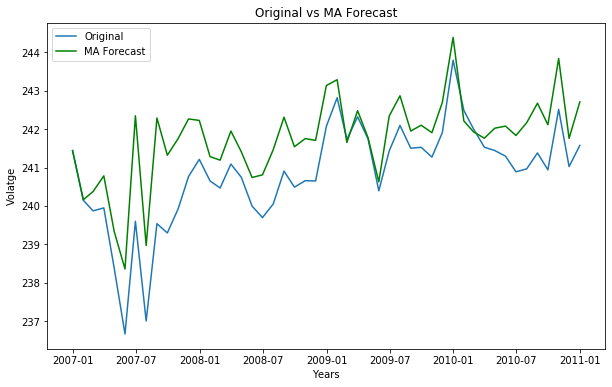

In [77]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Pred_MA_diff = pd.Series(MA_Forecast_fit.fittedvalues, copy=True)
Pred_MA_diff_cumsum = Pred_MA_diff.cumsum()

# Taking back to Original Scale
Pred_MA = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Pred_MA = Pred_MA.add(Pred_MA_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] , label = 'Original')
plt.plot(Pred_MA , color = 'green' , label = 'MA Forecast')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs MA Forecast')

# -> ARIMA Model
Now we use Combined ARIMA Modeling to create a model to forcast the Voltage.

Making Forcast_Model of the order ( p=1, d=1, q=1)

In [78]:
Forcast_Model = ARIMA(Model_Dataset , order = (1,1,1))

fit Forcast_Model

In [79]:
Forcast_Model_fit = Forcast_Model.fit()

AIC Score of ARIMA model

In [80]:
Forcast_Model_fit.aic

138.12636453172675

RMSE 

In [82]:
RMSE = np.sqrt(mean_squared_error(DataMINUSshift,Forcast_Model_fit.fittedvalues))
RMSE

0.9532302520778726

Visualization

Text(0.5, 1.0, 'Data with difference vs fittedvalues')

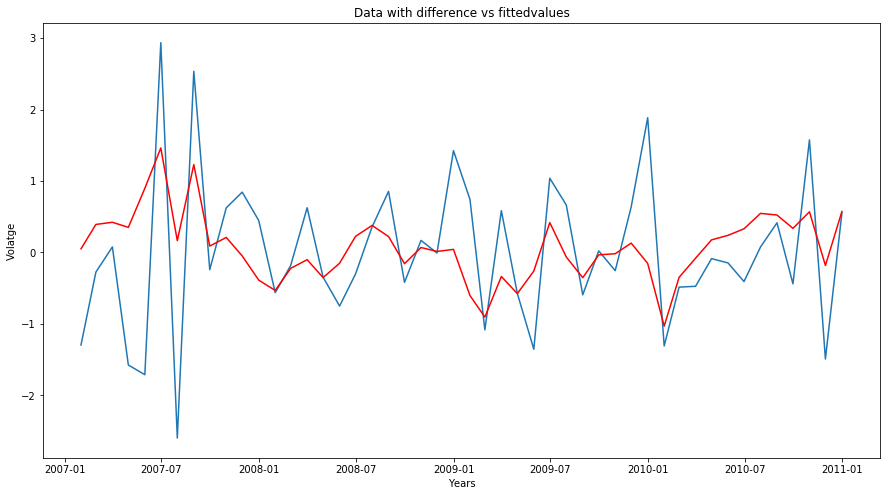

In [86]:
plt.figure(figsize=[15,8])
plt.plot(DataMINUSshift)
plt.plot(Forcast_Model_fit.fittedvalues, color='red')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Data with difference vs fittedvalues')

Text(0.5, 1.0, 'Original vs ARIMA Forecasting')

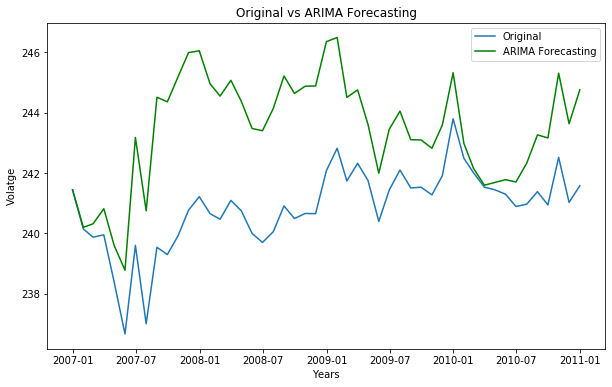

In [83]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Forecast_diff = pd.Series(Forcast_Model_fit.fittedvalues, copy=True)
Forecast_diff_cumsum = Forecast_diff.cumsum()

# Taking back to Original Scale
Forecast_value = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Forecast_value = Forecast_value.add(Forecast_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] , label = 'Original')
plt.plot(Forecast_value , color = 'green' , label = 'ARIMA Forecasting')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs ARIMA Forecasting')